In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
data = pd.read_csv('customer-churn.csv', encoding='unicode_escape')

 Primer vistazo a todos los features que contiene el dataset, se puede apreciar que hay muchos features categóricos

In [135]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Comprobar que el dataset no tenga valores nulos, en este problema no existen

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


`data.nunique()` permite ver cuantas categorías tiene cada valor categórico

In [137]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [138]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Con `data.describe()` se puede observar si es posible que existan outliers en los features numéricos, con la información mostrada no se considero que este problema cuente con outliers que haya q tratar 

In [139]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Por un error encontrado durante la ejecución de uno de los modelos de ml, se busca en el dataset que valores son `' '` y se encuentra que en la columna de `TotalCharges` existen varios de ellos. Como en las filas correspondientes a esos valores, si existen los valores de la columna `MonthlyCharges` y los valores de `tenure` indican que son clientes nuevos, se cambian los valores de ` ` a su valor de `MonthlyCharges` correspondiente  

In [140]:
for c in data.columns:
    print(c)
    print(data[data[c] == ' '].index)


customerID
Int64Index([], dtype='int64')
gender
Int64Index([], dtype='int64')
SeniorCitizen
Int64Index([], dtype='int64')
Partner
Int64Index([], dtype='int64')
Dependents
Int64Index([], dtype='int64')
tenure
Int64Index([], dtype='int64')
PhoneService
Int64Index([], dtype='int64')
MultipleLines
Int64Index([], dtype='int64')
InternetService
Int64Index([], dtype='int64')
OnlineSecurity
Int64Index([], dtype='int64')
OnlineBackup
Int64Index([], dtype='int64')
DeviceProtection
Int64Index([], dtype='int64')
TechSupport
Int64Index([], dtype='int64')
StreamingTV
Int64Index([], dtype='int64')
StreamingMovies
Int64Index([], dtype='int64')
Contract
Int64Index([], dtype='int64')
PaperlessBilling
Int64Index([], dtype='int64')
PaymentMethod
Int64Index([], dtype='int64')
MonthlyCharges
Int64Index([], dtype='int64')
TotalCharges
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
Churn
Int64Index([], dtype='int64')


In [141]:
rows_index_with_empty = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
rows_with_empty = data.iloc[rows_index_with_empty]
rows_with_empty

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [142]:
for row_index in rows_index_with_empty:
    value_to_put = data.at[row_index, 'MonthlyCharges']
    data.at[row_index, 'TotalCharges'] = value_to_put

Convertir todos los valores de la columna `TotalCharges` a float, anteriormente eran detectados como object 

In [143]:
data['TotalCharges'] = data['TotalCharges'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Se convierten todos los features categóricos a numéricos para que los modelos de ml puedan procesarlos

In [144]:
from pandas import DataFrame
from sklearn.preprocessing import OneHotEncoder

def convert_categorical_to_num(dataframe: DataFrame, column_name: str):
    onehotencoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
    encoded_column = onehotencoder.fit_transform(dataframe[column_name].to_numpy().reshape(-1,1))
    return onehotencoder, encoded_column

def build_ids_from_column(data: DataFrame, column_name: str, replace=True):
    count = 0
    ids = {}
    for v in data[column_name]:
        if v not in ids:
            ids[v] = count
            count+=1
    if replace:
        data[column_name].replace(ids, inplace=True)
    return ids



El análisis de la matriz de correlacion muestra la alta correlación entre `tenure` y `TotalCharges`, la cual era de esperar, podría removerse una de las dos y analizar como afecta a los modelos

<Axes: >

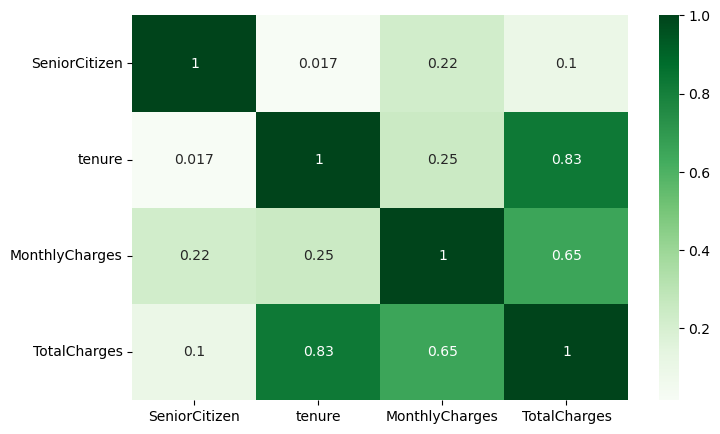

In [145]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(8,5))
sns.heatmap(corr, cmap="Greens",annot=True)

In [146]:
gender_id = build_ids_from_column(data, 'gender')
senior_citizen_id = build_ids_from_column(data, 'SeniorCitizen')
partner_id = build_ids_from_column(data, 'Partner')
dependents_id = build_ids_from_column(data, 'Dependents')
phone_service_id = build_ids_from_column(data, 'PhoneService')
multiple_lines_id = build_ids_from_column(data, 'MultipleLines')
internet_service_id = build_ids_from_column(data, 'InternetService')
online_security_id = build_ids_from_column(data, 'OnlineSecurity')
device_protection_id = build_ids_from_column(data, 'DeviceProtection')
tech_support_id = build_ids_from_column(data, 'TechSupport')
streaming_tv_id = build_ids_from_column(data, 'StreamingTV')
streaming_movies_id = build_ids_from_column(data, 'StreamingMovies')
contract_id = build_ids_from_column(data, 'Contract')
paperless_billing_id = build_ids_from_column(data, 'PaperlessBilling')
payment_method = build_ids_from_column(data, 'PaymentMethod')
churn_id = build_ids_from_column(data, 'Churn')
online_backup_id = build_ids_from_column(data, 'OnlineBackup')

In [147]:
y = data['Churn']
data.drop(['Churn','customerID'], inplace=True, axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65


In [148]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, make_scorer
# print(X)
# print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.1, shuffle=False)


Al analizar la proporción entre los clientes que tienen `Churn` en true y los q no, se observa que hay muchos mas datos de clientes con `Churn` en false, lo cual puede explicar que mas adelante los modelos identifiquen mejor a los que no harán `Churn`

In [149]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 4664, 1: 1674})
Counter({0: 510, 1: 195})


In [150]:
from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = logistic_clf.predict(X_test)

/home/daniel/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [151]:
def apply_metrics(true_values, predicted_values):
    metrics = {}
    metrics['accuracy_score'] = accuracy_score(true_values, predicted_values)
    metrics['recall_score'] = recall_score(true_values, predicted_values)
    metrics['precision_score'] = precision_score(true_values, predicted_values)
    metrics['f1_score'] = f1_score(true_values, predicted_values)
    metrics['roc_auc_score'] = roc_auc_score(true_values, predicted_values)
    metrics['confusion_matrix'] = confusion_matrix(true_values, predicted_values)
    return metrics

In [152]:
lr_metrics = apply_metrics(y_test, y_pred)
lr_metrics

{'accuracy_score': 0.8,
 'recall_score': 0.48205128205128206,
 'precision_score': 0.7014925373134329,
 'f1_score': 0.5714285714285714,
 'roc_auc_score': 0.7018099547511313,
 'confusion_matrix': array([[470,  40],
        [101,  94]])}

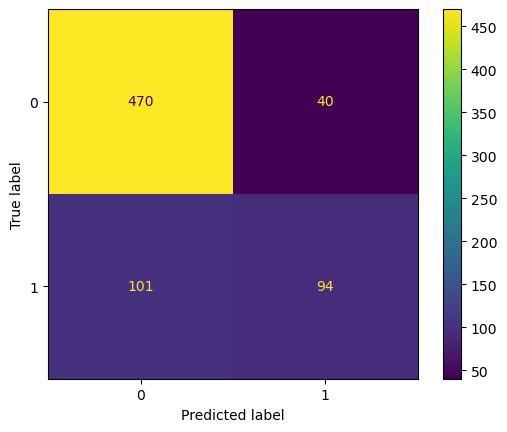

In [153]:
def plot_confusion_matrix(clf, true_values, predicted_values):
    cm = confusion_matrix(true_values, predicted_values, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
    disp.plot()

plot_confusion_matrix(logistic_clf, y_test, y_pred)

In [154]:
from sklearn.ensemble import RandomForestClassifier

random_forest_clf = RandomForestClassifier(max_depth=4, random_state=0)
random_forest_clf.fit(X_train, y_train)
y_pred = random_forest_clf.predict(X_test)

In [155]:
random_forest_metrics = apply_metrics(y_test, y_pred)
random_forest_metrics


{'accuracy_score': 0.8028368794326242,
 'recall_score': 0.4307692307692308,
 'precision_score': 0.75,
 'f1_score': 0.5472312703583062,
 'roc_auc_score': 0.6879336349924585,
 'confusion_matrix': array([[482,  28],
        [111,  84]])}

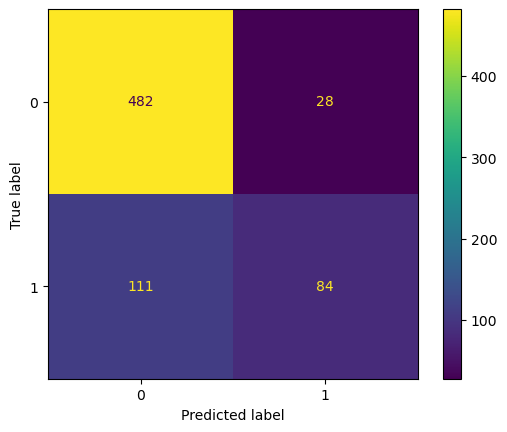

In [156]:
plot_confusion_matrix(random_forest_clf, y_test, y_pred)

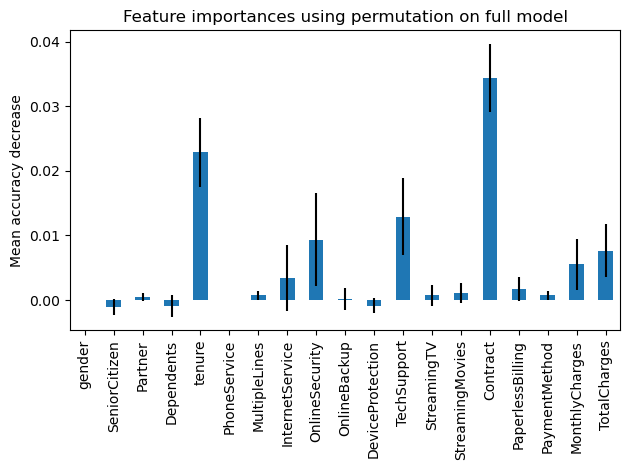

In [157]:
from sklearn.inspection import permutation_importance


result = permutation_importance(
    random_forest_clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=data.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()


In [158]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=0, kernel='poly'))
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)


In [159]:
svc_metrics = apply_metrics(y_test, y_pred)
svc_metrics


{'accuracy_score': 0.8099290780141843,
 'recall_score': 0.4564102564102564,
 'precision_score': 0.7606837606837606,
 'f1_score': 0.5705128205128206,
 'roc_auc_score': 0.7007541478129713,
 'confusion_matrix': array([[482,  28],
        [106,  89]])}

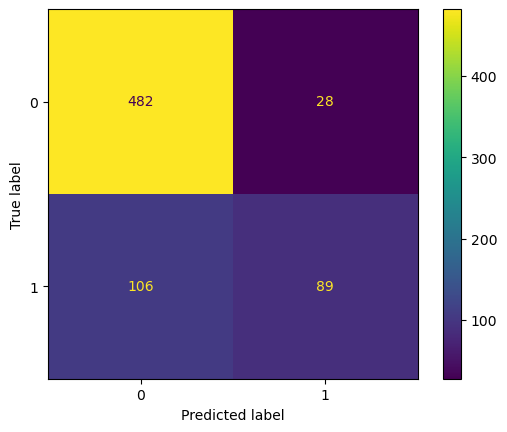

In [160]:
plot_confusion_matrix(svc_clf, y_test, y_pred)

In [161]:
lr_metrics

{'accuracy_score': 0.8,
 'recall_score': 0.48205128205128206,
 'precision_score': 0.7014925373134329,
 'f1_score': 0.5714285714285714,
 'roc_auc_score': 0.7018099547511313,
 'confusion_matrix': array([[470,  40],
        [101,  94]])}

Los 3 modelos probados arrojan resultados bastante similares, se realiza `cross validation` para asegurar que generalizen adecuadamente, `LogisticRegression` y `SVC` son los mejores y `LogisticRegression` aparenta ser ligeramente superior

In [162]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'auc': make_scorer(roc_auc_score), 'f1': make_scorer(f1_score)}
cv_svc = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=0, kernel='poly'))
cv_svc_scores = cross_validate(cv_svc, data, y, scoring=scoring)
cv_random_forest = RandomForestClassifier(max_depth=2, random_state=0)
cv_random_forest_scores = cross_validate(cv_random_forest, data, y, scoring=scoring)
cv_lr = LogisticRegression(random_state=0).fit(X_train, y_train)
cv_lr_scores = cross_validate(cv_lr, data, y, scoring=scoring)


/home/daniel/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/daniel/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [163]:
cv_lr_scores

{'fit_time': array([0.02896714, 0.02849531, 0.02901602, 0.0275631 , 0.02819347]),
 'score_time': array([0.0064733 , 0.00657654, 0.00686979, 0.00660443, 0.00659084]),
 'test_accuracy': array([0.80624556, 0.81121363, 0.79559972, 0.81178977, 0.80184659]),
 'test_precision': array([0.66666667, 0.66564417, 0.63522013, 0.66981132, 0.66211604]),
 'test_recall': array([0.54010695, 0.5802139 , 0.54010695, 0.57104558, 0.51871658]),
 'test_auc': array([0.72126121, 0.73744995, 0.71401483, 0.73479815, 0.71148595]),
 'test_f1': array([0.59675037, 0.62      , 0.58381503, 0.61649783, 0.58170915])}

In [164]:
cv_random_forest_scores

{'fit_time': array([0.16740036, 0.16744685, 0.16368937, 0.16834974, 0.1722331 ]),
 'score_time': array([0.01564884, 0.0158608 , 0.01615858, 0.01685929, 0.01626182]),
 'test_accuracy': array([0.77146913, 0.76933996, 0.76082328, 0.765625  , 0.76349432]),
 'test_precision': array([0.81707317, 0.72477064, 0.7032967 , 0.7721519 , 0.73033708]),
 'test_recall': array([0.17914439, 0.21122995, 0.17112299, 0.16353887, 0.17379679]),
 'test_auc': array([0.58232582, 0.59112222, 0.57251802, 0.57307378, 0.57529298]),
 'test_f1': array([0.29385965, 0.32712215, 0.27526882, 0.2699115 , 0.28077754])}

In [165]:
cv_svc_scores

{'fit_time': array([0.53293133, 0.53122354, 0.5006752 , 0.51691389, 0.57570553]),
 'score_time': array([0.07918811, 0.0740726 , 0.07371902, 0.07393932, 0.08180928]),
 'test_accuracy': array([0.80056778, 0.80056778, 0.78566359, 0.80539773, 0.80823864]),
 'test_precision': array([0.68825911, 0.69135802, 0.65254237, 0.71428571, 0.71138211]),
 'test_recall': array([0.45454545, 0.44919786, 0.41176471, 0.44235925, 0.46791444]),
 'test_auc': array([0.69007466, 0.68836705, 0.66626883, 0.68929557, 0.69962453]),
 'test_f1': array([0.54750403, 0.5445705 , 0.50491803, 0.54635762, 0.56451613])}

Probar eliminar la columna `TotalCharges` para ver como afecta a los modelos, se comprueba que afecta ligeramente la precisión

In [166]:
data.drop('TotalCharges', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.1, shuffle=False)
scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'auc': make_scorer(roc_auc_score), 'f1': make_scorer(f1_score)}
cv_svc = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=0, kernel='poly'))
cv_svc_scores = cross_validate(cv_svc, data, y, scoring=scoring)
cv_random_forest = RandomForestClassifier(max_depth=2, random_state=0)
cv_random_forest_scores = cross_validate(cv_random_forest, data, y, scoring=scoring)
cv_lr = LogisticRegression(random_state=0).fit(X_train, y_train)
cv_lr_scores = cross_validate(cv_lr, data, y, scoring=scoring)

/home/daniel/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/daniel/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [167]:
cv_lr_scores

{'fit_time': array([0.02177119, 0.02262831, 0.0209868 , 0.02245259, 0.02192497]),
 'score_time': array([0.00505614, 0.00533462, 0.00554967, 0.00499868, 0.00509453]),
 'test_accuracy': array([0.80695529, 0.81192335, 0.78708304, 0.80539773, 0.80326705]),
 'test_precision': array([0.66242038, 0.66978193, 0.62333333, 0.65714286, 0.66220736]),
 'test_recall': array([0.55614973, 0.57486631, 0.5       , 0.55495979, 0.52941176]),
 'test_auc': array([0.72686714, 0.73622543, 0.69541063, 0.72530598, 0.71586642]),
 'test_f1': array([0.60465116, 0.61870504, 0.55489614, 0.60174419, 0.5884101 ])}

In [168]:
cv_random_forest_scores

{'fit_time': array([0.13398361, 0.13304615, 0.13339853, 0.13347507, 0.13370371]),
 'score_time': array([0.01339412, 0.01370215, 0.01333475, 0.01336193, 0.0134263 ]),
 'test_accuracy': array([0.76721079, 0.77004968, 0.75940383, 0.76278409, 0.77627841]),
 'test_precision': array([0.7804878 , 0.75510204, 0.6635514 , 0.76712329, 0.7979798 ]),
 'test_recall': array([0.17112299, 0.19786096, 0.18983957, 0.15013405, 0.21122995]),
 'test_auc': array([0.57686585, 0.58733628, 0.57752848, 0.56685446, 0.59594379]),
 'test_f1': array([0.28070175, 0.31355932, 0.2952183 , 0.25112108, 0.33403805])}

In [169]:
cv_svc_scores

{'fit_time': array([0.41907811, 0.42717266, 0.43256998, 0.41180253, 0.41343307]),
 'score_time': array([0.06624126, 0.07002282, 0.06698799, 0.06801391, 0.06708407]),
 'test_accuracy': array([0.79985806, 0.80198722, 0.7828247 , 0.79971591, 0.80539773]),
 'test_precision': array([0.68699187, 0.6848249 , 0.636     , 0.68879668, 0.7016129 ]),
 'test_recall': array([0.45187166, 0.47058824, 0.42513369, 0.44504021, 0.46524064]),
 'test_auc': array([0.68873776, 0.69616368, 0.66860549, 0.68628822, 0.69683696]),
 'test_f1': array([0.54516129, 0.55784469, 0.50961538, 0.54071661, 0.55948553])}